In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import risk_kit as kit
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload

## GBM Interactive plots

In [2]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Model
    """
    s_0 = 100
    prices = kit.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5)) 
    # alpha is transparency of line
    ax.axhline(y=100, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)
    

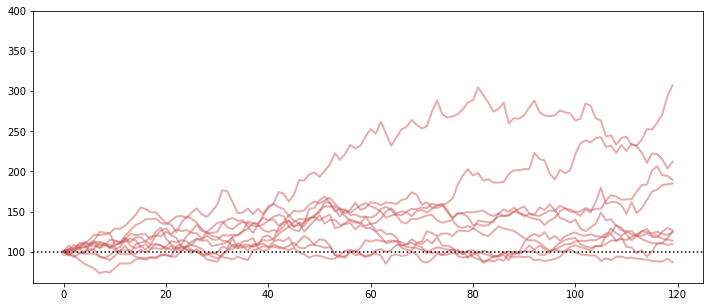

In [3]:
# check
show_gbm(10, 0.07, 0.15)

In [4]:
# Define a control panel
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios = (1, 20, 1),
                                   mu = (-0.2, 0.2, 0.01),
                                   sigma = (0, 0.3, 0.01)
                                  )

In [5]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

You can see that the drift changes with mu and the spread changes with sigma. WHen sigma=0, there is no volatility, there is no fluctuation in the returns and it goes straight up.

## INTERACTIVE CPPI SIMULATION - MONTE CARLO

In [6]:
def show_cppi(n_scenarios=50, mu=0.7, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation on CPPI
    """
    start = 100
    # generate Brownian motions
    sim_rets = kit.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12) 
    risky_r = pd.DataFrame(sim_rets)
    
    # run the back test
    btr = kit.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # Scaling the y_max, acts as a kind of way to zoom into a portion of the plot.
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    # set y limit
    ax.set_ylim(top=y_max)

In [7]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu = (0, +.2, 0.01),
                                    sigma = (0, .30, .05),
                                    floor = (0, 2, 0.1),
                                    m = (1, 5, 0.5),
                                    riskfree_rate = (0., .05, 0.01),
                                    y_max = widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis")
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [8]:
# show CPPI using matplotlib
def show_CPPI(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = kit.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = kit.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")                                                                                   

In [9]:
cppi_controls = widgets.interactive(show_CPPI,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, 0.01),
                                    sigma=(0, .3, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis")
                                   )
display(cppi_controls)
                                   
                                

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Principal protected product is when floor=1, where you say you do not want to take any loss.

In [10]:
# Add violations
def show_CPPI(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = kit.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    
    # run the back test
    btr = kit.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    # how often does the terminal wealth end up below the floor (boolean)
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    # probability of failure
    p_fail = n_failures/n_scenarios
    # expected shortfall - when there is a failure, what is the average failure extend
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures>0 else 0.0
    
    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")     
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)
        


In [11]:
cppi_controls = widgets.interactive(show_CPPI,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .3, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Rebals/Year"),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis")
                                   
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

When mu alone increases, the mean and median increases. When mu=0, median is around start value. There are no violations with low sigma. When we increase the volatility (sigma) and increase the multiplier and rebalance less often, you will get more violations.